# DR2UNet for TNBC PDX Tumor Segmentation Demo

This notebook runs the [WU-C2IR2/DR2UNet-for-TNBC-PDX-Tumor-Segmentation](https://github.com/WU-C2IR2/DR2UNet-for-TNBC-PDX-Tumor-Segmentation) and [Deep Learning Segmentation of Triple-Negative Breast Cancer (TNBC) Patient Derived Tumor Xenograft (PDX) and Sensitivity of Radiomic Pipeline to Tumor Probability Boundary](https://doi.org/10.3390/cancers13153795) models on a MR image of a TNBC PDX tumor.

In [1]:
from SegmentationPipeline import SegmentationPipeline

In [2]:
# Suppress some dicom warnings. Preclinical dicom files are not standard.
import warnings
import logging
logging.getLogger().setLevel(logging.INFO)
warnings.filterwarnings("ignore", category=UserWarning, module='pydicom')
warnings.filterwarnings("ignore", category=UserWarning, module='highdicom')

In [3]:
# Set the input, output, and weight directories
input_dir = './C28M1_MR_1/'
output_dir = './output'
weight_dir = './weights_new'

INFO:root:Initializing TNBC Segmentation Pipeline
INFO:root:Running DICOM segmentation pipeline
INFO:root:Loading DICOM series from ./C28M1_MR_1/
INFO:root:Found 32 DICOM files
INFO:root:Found 2 series, each with 16 slices, each with shape (128, 128)
INFO:root:Loading segmentation model: r2udensenet
INFO:root:Preprocessing images
INFO:root:Preprocessed images shape: (16, 128, 128, 2)
INFO:root:Preprocessed images type: float32
INFO:root:Preprocessed images min: -0.7677336931228638
INFO:root:Preprocessed images max: 6.798820972442627
INFO:root:Preprocessed images md5 hash: 7ddfe216c94bd9631d46076526a1925e
INFO:root:Segmenting images
2024-08-02 14:14:44.338719: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 75ms/step


INFO:root:Saving segmentation masks
INFO:root:Saving segmentation masks
INFO:highdicom.base:copy Image-related attributes from dataset "1.2.826.0.1.9717382.2019.05.20.133.4082.1.163946.1"
INFO:highdicom.base:copy attributes of module "Specimen"
INFO:highdicom.base:copy Patient-related attributes from dataset "1.2.826.0.1.9717382.2019.05.20.133.4082.1.163946.1"
INFO:highdicom.base:copy attributes of module "Patient"
INFO:highdicom.base:copy attributes of module "Clinical Trial Subject"
INFO:highdicom.base:copy Study-related attributes from dataset "1.2.826.0.1.9717382.2019.05.20.133.4082.1.163946.1"
INFO:highdicom.base:copy attributes of module "General Study"
INFO:highdicom.base:copy attributes of module "Patient Study"
INFO:highdicom.base:copy attributes of module "Clinical Trial Study"
INFO:root:Saved segmentation mask for series 1.2.826.0.1.9717382.2019.05.20.133.4082 to ./output/mask_4082.dcm
INFO:highdicom.base:copy Image-related attributes from dataset "1.2.826.0.1.9717382.2019.0

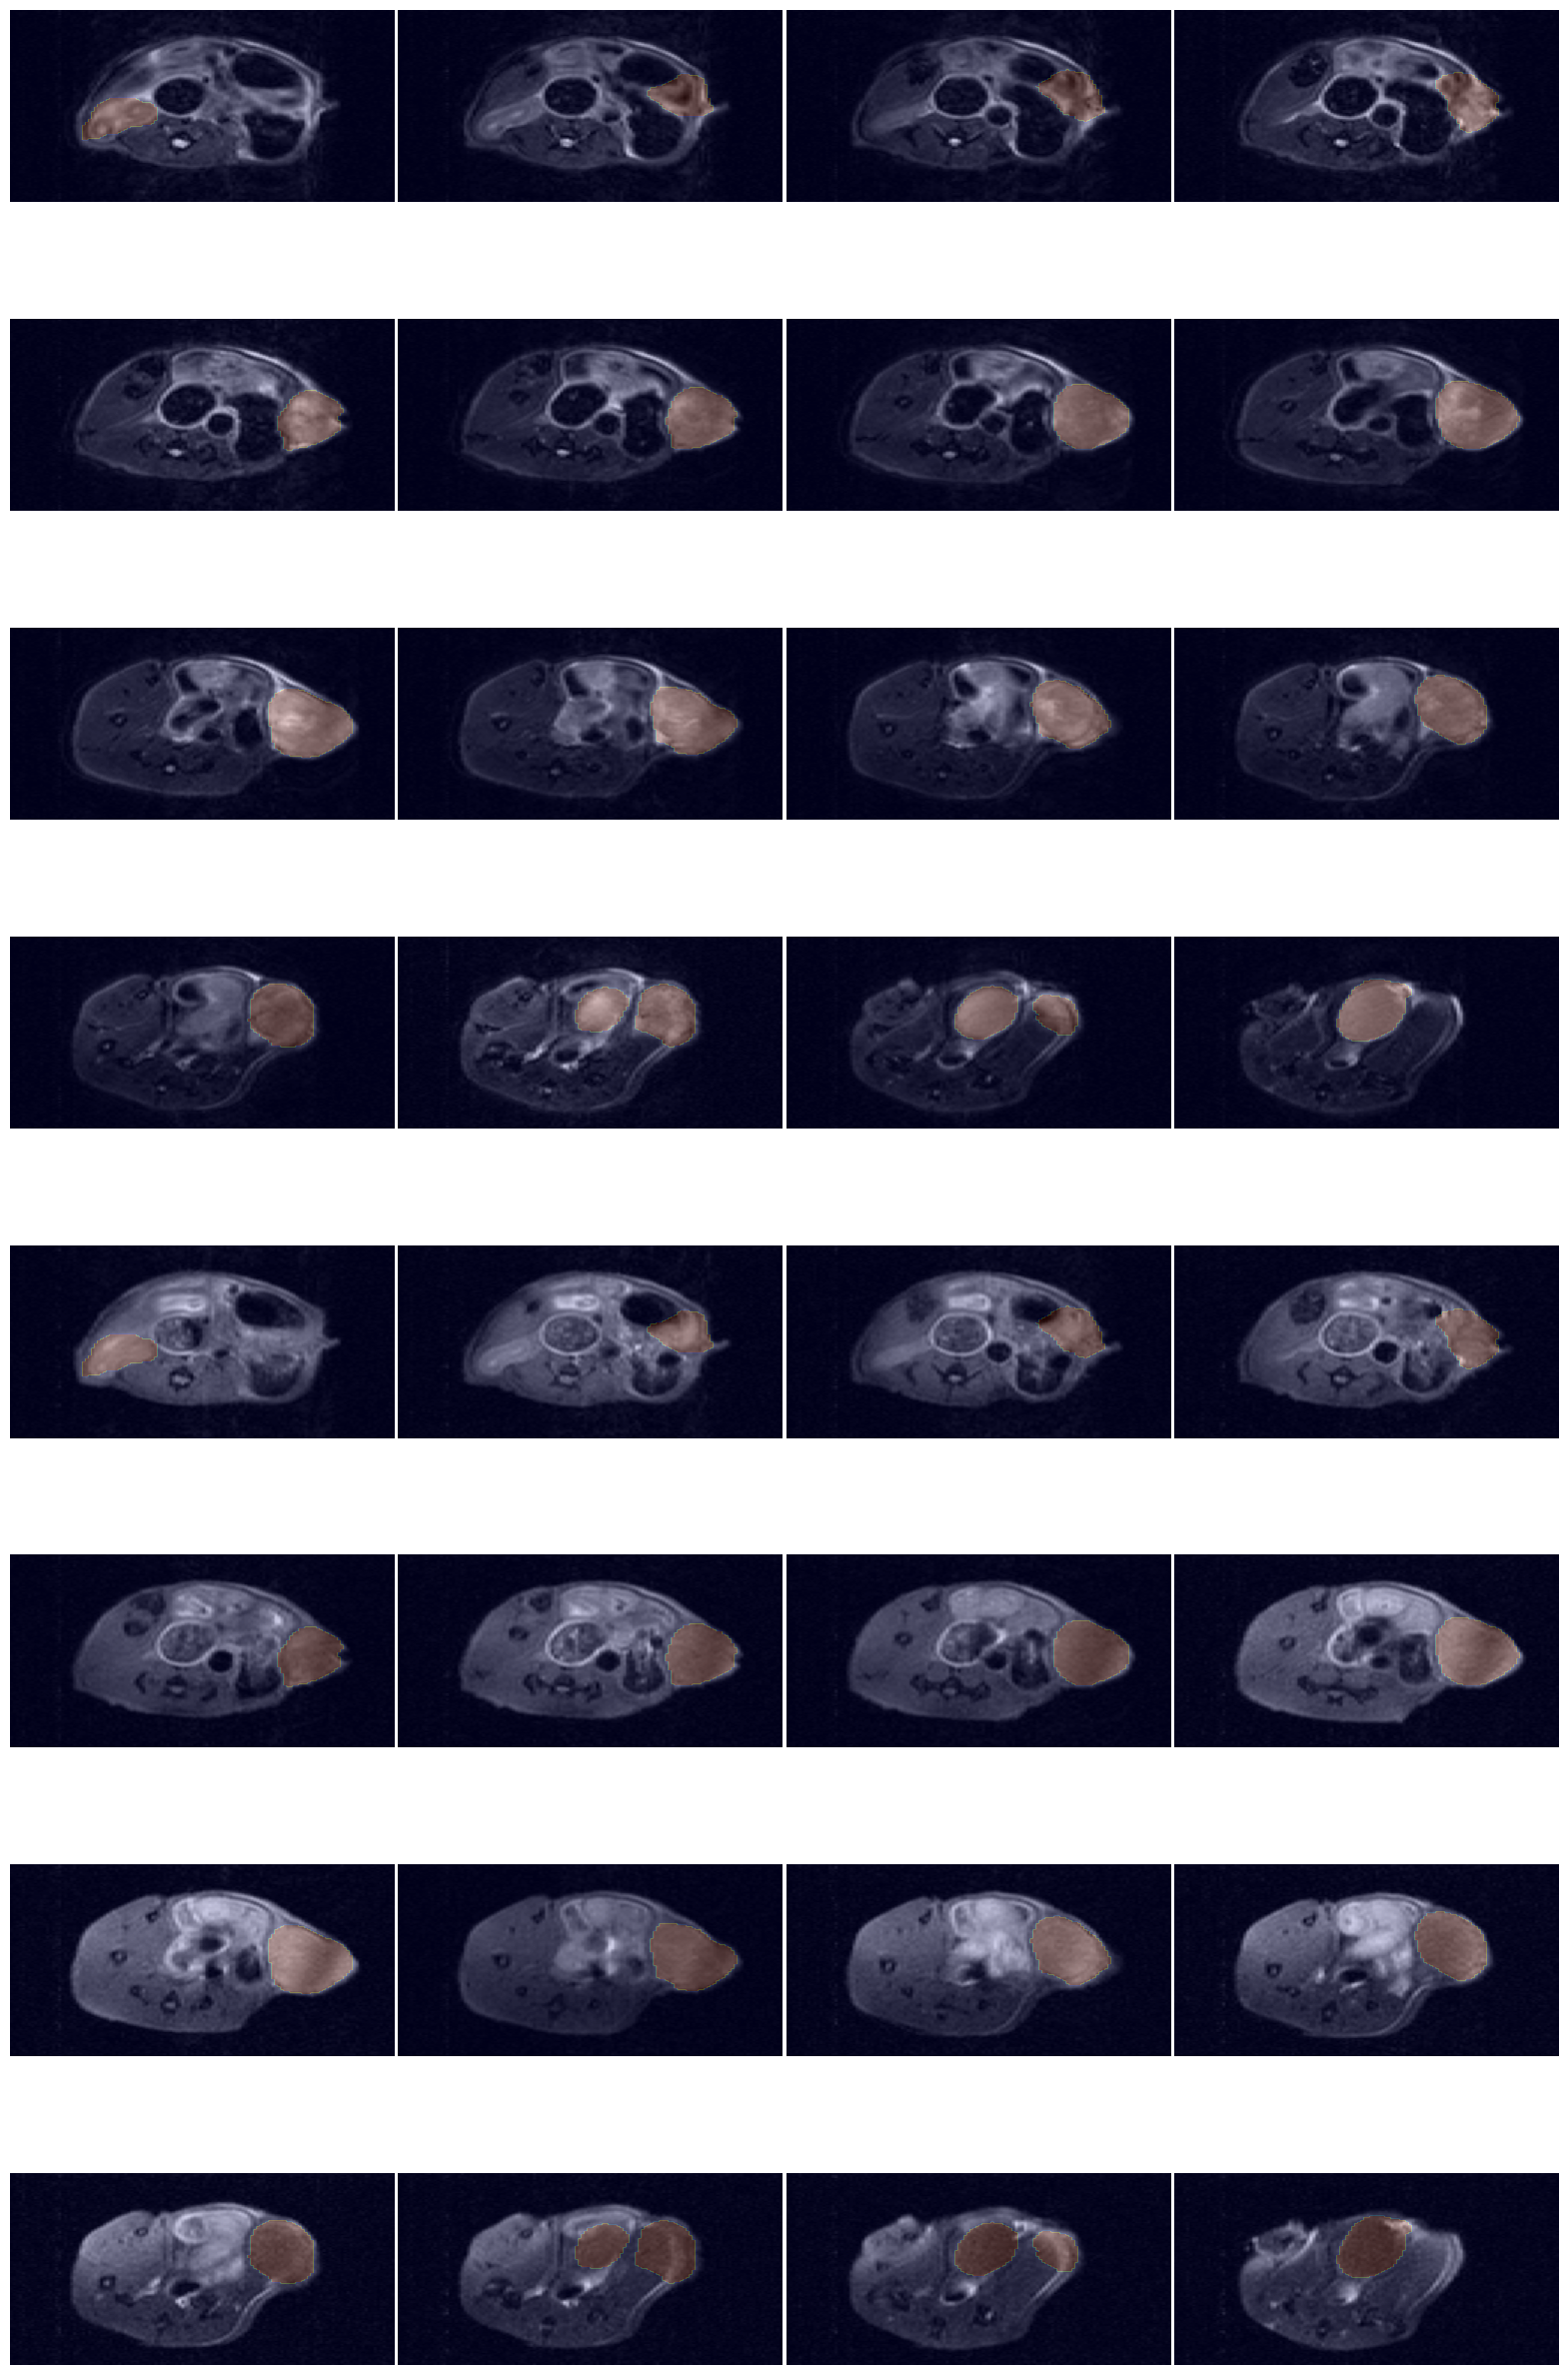

In [4]:
segmentor = SegmentationPipeline(input_dir, output_dir, weight_dir)
segmentor.run_pipeline()
segmentor.visualize_segmentation();